# Guia da Camada de Transporte
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de transporte, além de suas funções e ferramentas.


In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-09-06 15:53:16,185: Qubit 0 adicionado à memória do Host 0.
2024-09-06 15:53:16,187: Qubit 0 criado com fidelidade inicial 0.8630440269948967 e adicionado à memória do Host 0.
2024-09-06 15:53:16,187: Qubit 1 adicionado à memória do Host 0.
2024-09-06 15:53:16,188: Qubit 1 criado com fidelidade inicial 0.2728578497672314 e adicionado à memória do Host 0.
2024-09-06 15:53:16,189: Qubit 2 adicionado à memória do Host 0.
2024-09-06 15:53:16,189: Qubit 2 criado com fidelidade inicial 0.33147356354443835 e adicionado à memória do Host 0.
2024-09-06 15:53:16,189: Qubit 3 adicionado à memória do Host 0.
2024-09-06 15:53:16,190: Qubit 3 criado com fidelidade inicial 0.392698465160332 e adicionado à memória do Host 0.
2024-09-06 15:53:16,191: Qubit 4 adicionado à memória do Host 0.
2024-09-06 15:53:16,193: Qubit 4 criado com fidelidade inicial 0.8346452667864227 e adicionado à memória do Host 0.
2024-09-06 15:53:16,194: Qubit 5 adicionado à memória do Host 0.
2024-09-06 15:53:16,194: Qubit

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


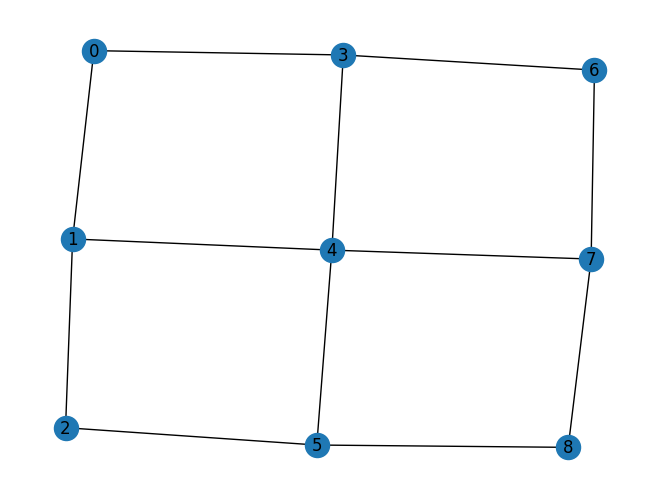

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente.

In [3]:
alice = rede.get_host(0)
bob = rede.get_host(8)

##### Verificação da memória de Alice e Bob.

In [4]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x78178c777440>, <quantumnet.objects.qubit.Qubit object at 0x781789feae70>, <quantumnet.objects.qubit.Qubit object at 0x781789feab70>, <quantumnet.objects.qubit.Qubit object at 0x781789fe9400>, <quantumnet.objects.qubit.Qubit object at 0x781789fe9130>, <quantumnet.objects.qubit.Qubit object at 0x78178804e1b0>, <quantumnet.objects.qubit.Qubit object at 0x781788172ba0>, <quantumnet.objects.qubit.Qubit object at 0x781783f86600>, <quantumnet.objects.qubit.Qubit object at 0x781783526360>, <quantumnet.objects.qubit.Qubit object at 0x78178806e7e0>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x7817835adf10>, <quantumnet.objects.qubit.Qubit object at 0x7817835af5c0>, <quantumnet.objects.qubit.Qubit object at 0x7817880bf530>, <quantumnet.objects.qubit.Qubit object at 0x7817835af680>, <quantumnet.objects.qubit.Qubit object at 0x7817835af7d0>, <quantumnet.objects.qubit.Qubit object at 0x7817835af620>, <quantumnet.objects.

##### Nesse função, é enviado um request para a rede, solicitando uma rota para a transmissão de 2 qubits de Alice(0) para Bob(8).

In [5]:
rede.transportlayer.request_transmission(0,8, 2)

2024-09-06 15:53:17,498: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,500: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,502: Transmissão de 2 qubits entre 0 e 8 concluída com sucesso. Timeslot: 1


True

##### o protocolo de teletrnasporte realiza a transmissão de Alice para Bob.

In [6]:
rede.transportlayer.teleportation_protocol(0,8)

2024-09-06 15:53:17,572: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,573: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.6639802055828451. Timeslot: 2


True

In [7]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x781789feae70>, <quantumnet.objects.qubit.Qubit object at 0x781789feab70>, <quantumnet.objects.qubit.Qubit object at 0x781789fe9400>, <quantumnet.objects.qubit.Qubit object at 0x781789fe9130>, <quantumnet.objects.qubit.Qubit object at 0x78178804e1b0>, <quantumnet.objects.qubit.Qubit object at 0x781788172ba0>, <quantumnet.objects.qubit.Qubit object at 0x781783f86600>, <quantumnet.objects.qubit.Qubit object at 0x781783526360>, <quantumnet.objects.qubit.Qubit object at 0x78178806e7e0>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x7817835adf10>, <quantumnet.objects.qubit.Qubit object at 0x7817835af5c0>, <quantumnet.objects.qubit.Qubit object at 0x7817880bf530>, <quantumnet.objects.qubit.Qubit object at 0x7817835af680>, <quantumnet.objects.qubit.Qubit object at 0x7817835af7d0>, <quantumnet.objects.qubit.Qubit object at 0x7817835af620>, <quantumnet.objects.qubit.Qubit object at 0x7817835af890>, <quantumnet.objects.

##### A função a seguir é chamada para que seja realizada a requesição de uma rota para que haja a transmissão de n qubits necessários. Ela vai executar toda a camada de transporte.

In [8]:
rede.transportlayer.run_transport_layer(0,8,9)

2024-09-06 15:53:17,723: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,724: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,726: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,727: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,728: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,729: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,730: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,731: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,732: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-09-06 15:53:17,733: Teletransporte de qubit de 0 para 8 na rota [0, 3, 6, 7, 8] foi bem-sucedido com fidelidade final de 0.2728578497672314. Timeslot: 3
2024-09-06 15:53:17,736: Teletransporte de qubit de 0 para 8 na rota [0, 3, 6, 7, 8] foi bem-sucedido com fidelidade final de 0.33147356354443835. Timeslot: 4
2024-09-06 15:53:17,737: Teletransporte de qubit de 0 para 8 na rota [0, 3, 6, 7, 8] foi bem-suced

True

In [9]:
rede.get_total_useds_qubits()

2024-09-06 15:53:17,797: Qubits usados na camada PhysicalLayer: 0
2024-09-06 15:53:17,798: Qubits usados na camada LinkLayer: 0
2024-09-06 15:53:17,799: Qubits usados na camada TransportLayer: 9
2024-09-06 15:53:17,799: Qubits usados na camada ApplicationLayer: 0


9

In [10]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: []
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x7817835adf10>, <quantumnet.objects.qubit.Qubit object at 0x7817835af5c0>, <quantumnet.objects.qubit.Qubit object at 0x7817880bf530>, <quantumnet.objects.qubit.Qubit object at 0x7817835af680>, <quantumnet.objects.qubit.Qubit object at 0x7817835af7d0>, <quantumnet.objects.qubit.Qubit object at 0x7817835af620>, <quantumnet.objects.qubit.Qubit object at 0x7817835af890>, <quantumnet.objects.qubit.Qubit object at 0x781783596cc0>, <quantumnet.objects.qubit.Qubit object at 0x7817835af3b0>, <quantumnet.objects.qubit.Qubit object at 0x78178c777440>, <quantumnet.objects.qubit.Qubit object at 0x781789feae70>, <quantumnet.objects.qubit.Qubit object at 0x781789feab70>, <quantumnet.objects.qubit.Qubit object at 0x781789fe9400>, <quantumnet.objects.qubit.Qubit object at 0x781789fe9130>, <quantumnet.objects.qubit.Qubit object at 0x78178804e1b0>, <quantumnet.objects.qubit.Qubit object at 0x781788172ba0>, <quantumnet.object

##### Essa função apresenta uma lista de métricas do transmissão dos qubits.

In [11]:
rede.transportlayer.get_teleported_qubits()

[{'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.8630440269948967,
  'fidelity_bob': 0.7693468523208623,
  'fidelity_route': 1.0,
  'F_final': 0.6639802055828451,
  'qubit_alice': <quantumnet.objects.qubit.Qubit at 0x78178c777440>,
  'qubit_bob': <quantumnet.objects.qubit.Qubit at 0x7817835afbf0>,
  'success': True}]

In [12]:
rede.transportlayer.timeslot

11

In [13]:
rede.transportlayer.avg_fidelity_on_transportlayer()

2024-09-06 15:53:18,166: A fidelidade média dos EPRs na camada de transporte é 1.0


1.0

In [14]:
rede.get_total_timeslot()

2024-09-06 15:53:18,248: Timeslot atual na camada PhysicalLayer: 0
2024-09-06 15:53:18,251: Timeslot atual na camada LinkLayer: 0
2024-09-06 15:53:18,253: Timeslot atual na camada NetworkLayer: 0
2024-09-06 15:53:18,254: Timeslot atual na camada TransportLayer: 11
2024-09-06 15:53:18,255: Timeslot atual na camada ApplicationLayer: 0


11